Dashboard URL: https://public.tableau.com/app/profile/afif.makruf/viz/P1M2/Dashboard1?publish=yes

# Problem Identification

### Defining the Problem Statement<br>
Using the SMART Framework:
1. **Specific**: Obtained a laptop from Galuh Computer shop.

2. **Measurable**: Obtain a laptop that fits the budget and is the most optimal.

3. **Achievable**: Utilise available data and exploratory analysis techniques, and provide useful insights.

4. **Relevant**: Provides useful insights for buyers to choose a suitable laptop. 

5. **Time-Bound**: In 5 days time.

`Problem Statement`:<br>
Get the most optimal and budget-friendly laptop from Galuh Computer store within 5 days.

### Breaking Down the Problem

Main problem: `Buyers don't know which laptop to buy`

To facilitate analysis and problem solving, it is necessary to understand the details of the problem. The method used is `5W+1H`.

`5W+1H`:
- What types of laptops do most brands release?
- Which laptop brands have released the most products?
- Do laptop prices differ significantly by brand?
- What is the correlation between RAM and Price?
- What is the correlation between CPU Frequency and Price?
- What is the correlation between Memory type score and Price?
- What is the correlation between GPU type Score and Price?
- How to determine the budget for buyers?
- How to determine the optimal laptop specifications within a certain budget range?

# Data Loading

Dataset source: https://www.kaggle.com/datasets/ironwolf437/laptop-price-dataset

Import the required libraries

In [83]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew, kurtosis
from scipy.stats import shapiro
from IPython.core.display import display, HTML

/var/folders/mp/4nzj1b3165sc5bv0_4ydnqp80000gn/T/ipykernel_89592/3160700537.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [39]:
df = pd.read_csv('laptop_price - dataset.csv')

In [40]:
df.head(10)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60
5,Acer,Aspire 3,Notebook,15.6,1366x768,AMD,A9-Series 9420,3.0,4,500GB HDD,AMD,Radeon R5,Windows 10,2.10,400.00
6,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.2,16,256GB Flash Storage,Intel,Iris Pro Graphics,Mac OS X,2.04,2139.97
7,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,256GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,1158.70
8,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel,Core i7 8550U,1.8,16,512GB SSD,Nvidia,GeForce MX150,Windows 10,1.30,1495.00
9,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel,Core i5 8250U,1.6,8,256GB SSD,Intel,UHD Graphics 620,Windows 10,1.60,770.00


In [41]:
# Menampilkan jumlah kolom dan baris dari dataframe
print(f"Jumlah kolom :{df.shape[1]}\nJumlah baris :{df.shape[0]}")

Jumlah kolom :15
Jumlah baris :1275


Explanation Columns contained in the dataset:
| Kolom | Description | Data Type | Example Value|
|------| ------| ------| ------|
| Company | Brand laptop | String | ['Apple', 'HP', 'Acer']
| Product | Nama laptop | String | ['Macbook Pro', '250 G6', 'Aspire 3']
| TypeName | Laptop type | String | ['Ultrabook', 'Notebook', 'Netbook']
| Inches | Laptop size (Inches) | Float | ['13.3', '15.6', '15.4']
| ScreenResolution | Laptop screen resolution | String | ['IPS Panel Retina Display 2560x1600', 'Full HD 1920x1080', '1366x768']
| CPU_Company | CPU brand | String | ['Intel', 'AMD', 'Samsung']
| CPU_Type | Processor | String | ['Core i5', 'Core i5 7200U', 'A9-Series 9420']
| CPU_Frequency (GHz) | CPU frequency of the laptop (GHz) | Float | ['2.3', '2.5', '3.0']
| RAM (GB) | Amount of RAM used (GB) | Integer | ['8', '16', '32']
| Memory | Laptop memory | String | ['128GB SSD', '256GB SSD', '500GB HDD	']
| GPU_Company | Brand of GPU | String | ['Intel', 'AMD', 'Nvidia']
| GPU_Type | GPU  | String | ['Iris Plus Graphics 640', 'HD Graphics 620', 'Radeon R5']
| OpSys | Operation System | String | ['macOS', 'No OS', 'Windows 10']
| Weight (kg) | Weight (Kg) | Float | ['1.37', '1.86', '2.10']
| Price (Euro) | Price (Euro) | Float | ['1339.69', '575.00', '400.00']

In [42]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


In [43]:
df.isnull().sum().sum()

0

Based on the data above, all rows do not have missing values

# Data Cleaning

This section contains the data preparation process in the form of data cleaning before further data exploration. The cleaning process can include giving a new name to each column, filling in missing values, deleting unused columns, and so on.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

Based on the data above, there are some columns that we think should be broken down, some columns that should be combined, as well as adding some columns

In [45]:
# Menginisialisasi bahwa 'data' adalah duplikat dari df
data = df.copy()

In [46]:
# Menggabungkan dua kolom menjadi satu kolom
data['CPU'] = data['CPU_Company']+ ' ' + data['CPU_Type']
data['GPU'] = data['GPU_Company']+ ' ' + data['GPU_Type']

Split the Memory column into 2 columns,<br>
the first column Memory by taking the amount of memory<br>
the second column Memory_Type by taking the type of memory used

In [47]:
data.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),CPU,GPU
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,Intel Core i5,Intel Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94,Intel Core i5,Intel HD Graphics 6000
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00,Intel Core i5 7200U,Intel HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45,Intel Core i7,AMD Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60,Intel Core i5,Intel Iris Plus Graphics 650


In [48]:
# Fungsi untuk menentukan jenis penyimpanan
def get_storage_type(storage):
    # Memeriksa apakah ada SSD, HDD, Flash Storage, Hybrid, atau kombinasi keduanya
    if 'SSD' in storage and 'HDD' in storage:
        if 'Hybrid' in storage:
            return 'SSD + Hybrid'
        return 'SSD + HDD'
    elif 'SSD' in storage and 'Flash Storage' not in storage:
        return 'SSD'
    elif 'HDD' in storage:
        return 'HDD'
    elif 'Flash Storage' in storage:
        return 'Flash Storage'
    elif 'Hybrid' in storage:
        return 'Hybrid'
    else:
        return 'Lain-Lain'  # Jika tidak ditemukan kategori yang sesuai

# Menerapkan fungsi ke kolom 'Storage' untuk membuat kolom baru 'Storage Type'
data['Memory_Type'] = data['Memory'].apply(get_storage_type)


In [49]:
data.groupby('Memory_Type').size()

Memory_Type
Flash Storage     70
HDD              360
Hybrid             8
SSD              637
SSD + HDD        200
dtype: int64

In [50]:
data.tail(5)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),CPU,GPU,Memory_Type
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.5,4,128GB SSD,Intel,HD Graphics 520,Windows 10,1.80,638.0,Intel Core i7 6500U,Intel HD Graphics 520,SSD
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.5,16,512GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1499.0,Intel Core i7 6500U,Intel HD Graphics 520,SSD
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel,Celeron Dual Core N3050,1.6,2,64GB Flash Storage,Intel,HD Graphics,Windows 10,1.50,229.0,Intel Celeron Dual Core N3050,Intel HD Graphics,Flash Storage
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,6,1TB HDD,AMD,Radeon R5 M330,Windows 10,2.19,764.0,Intel Core i7 6500U,AMD Radeon R5 M330,HDD
1274,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel,Celeron Dual Core N3050,1.6,4,500GB HDD,Intel,HD Graphics,Windows 10,2.20,369.0,Intel Celeron Dual Core N3050,Intel HD Graphics,HDD


Based on the data above, successfully retrieved data has been successfully retrieved

In [51]:
data.tail(5)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),CPU,GPU,Memory_Type
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.5,4,128GB SSD,Intel,HD Graphics 520,Windows 10,1.80,638.0,Intel Core i7 6500U,Intel HD Graphics 520,SSD
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.5,16,512GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1499.0,Intel Core i7 6500U,Intel HD Graphics 520,SSD
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel,Celeron Dual Core N3050,1.6,2,64GB Flash Storage,Intel,HD Graphics,Windows 10,1.50,229.0,Intel Celeron Dual Core N3050,Intel HD Graphics,Flash Storage
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,6,1TB HDD,AMD,Radeon R5 M330,Windows 10,2.19,764.0,Intel Core i7 6500U,AMD Radeon R5 M330,HDD
1274,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel,Celeron Dual Core N3050,1.6,4,500GB HDD,Intel,HD Graphics,Windows 10,2.20,369.0,Intel Celeron Dual Core N3050,Intel HD Graphics,HDD


In [52]:
# Menghapus kolom yang tidak dibutuhkan
data = data.drop(['GPU_Company', 'CPU_Company', 'CPU_Type', 'GPU_Type', 'Price (Euro)'], axis=1)

In [57]:
data.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory', 'OpSys', 'Weight (kg)',
       'Price (Euro)', 'CPU', 'GPU', 'Memory_Type', 'GPU_Type'],
      dtype='object')

In [58]:
data.rename(columns={'Price (Euro)': 'Price'}, inplace=True)

In [59]:
data['GPU_Type'] = 'Integrated'  # Inisialisasi tabel 'GPU_Type' dengan 'Integrated' sebagai default value

# Menggunakan DataFrame.loc[] untuk mengatur value berdasarkan kondisi pada kolom 'GPU'
data.loc[data['GPU'].str.contains('Geforce'), 'GPU_Type'] = 'Discrete'
data.loc[data['GPU'].str.contains('RX'), 'GPU_Type'] = 'Discrete'

In [60]:
# Kolom berhasil dibuat, dan value berhasil diatur berdasarkan kondisi pada kolom 'GPU'
data['GPU_Type'].unique()

array(['Integrated', 'Discrete'], dtype=object)

In [61]:
# Mengubah tipe data pada kolom Price menjadi integer
data.Price = data.Price.astype(int)

Provide the value of the Memory_Type column with the following conditions:
1. SSD = 3.0
2. Hybrid = 2.5
3. Flash Storage = 2.0
4. HDD = 1.0

In [62]:
memory_type_scores_updated = {
    'SSD': 3,                # Highest score for SSD
    'Hybrid': 2.5,           # Mid-high score for Hybrid
    'Flash Storage': 2,      # Medium score for Flash Storage
    'HDD': 1                 # Lowest score for HDD
}

data['Memory_Type'] = data['Memory_Type'].replace('SSD + HDD', 'Hybrid')

# Reapply the scoring system
data['Memory_Type_Score'] = data['Memory_Type'].map(memory_type_scores_updated)

# Memastikan data sudah ter-update
data[['Memory_Type', 'Memory_Type_Score']].drop_duplicates()

,Memory_Type,Memory_Type_Score
0,SSD,3.0
1,Flash Storage,2.0
5,HDD,1.0
21,Hybrid,2.5


Based on the data above, the addition of the Memory_Type_Score column was successfully added

In [63]:
gpu_type_scores = {
    'Discrete': 2,  # Higher score for Discrete GPUs
    'Integrated': 1  # Lower score for Integrated GPUs
}

# Map scores to the dataset and create a new column
data['GPU_Type_Score'] = data['GPU_Type'].map(gpu_type_scores)

# Memastikan data sudah ter-update
data[['GPU_Type', 'GPU_Type_Score']].drop_duplicates()

,GPU_Type,GPU_Type_Score
0,Integrated,1
47,Discrete,2


Based on the data above, the addition of the GPU_Type_Score column was successfully added

In [64]:
data.info()
data.describe().apply(lambda x: x.apply('{0:.5f}'.format))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Frequency (GHz)  1275 non-null   float64
 6   RAM (GB)             1275 non-null   int64  
 7   Memory               1275 non-null   object 
 8   OpSys                1275 non-null   object 
 9   Weight (kg)          1275 non-null   float64
 10  Price                1275 non-null   int64  
 11  CPU                  1275 non-null   object 
 12  GPU                  1275 non-null   object 
 13  Memory_Type          1275 non-null   object 
 14  GPU_Type             1275 non-null   object 
 15  Memory_Type_Score    1275 non-null   f

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price,Memory_Type_Score,GPU_Type_Score
count,1275.00000,1275.00000,1275.00000,1275.00000,1275.00000,1275.00000,1275.00000
mean,15.02290,2.30298,8.44078,2.04053,1134.84863,2.29882,1.00941
std,1.42947,0.50385,5.09781,0.66920,700.76215,0.85675,0.09659
min,10.10000,0.90000,2.00000,0.69000,174.00000,1.00000,1.00000
25%,14.00000,2.00000,4.00000,1.50000,609.00000,1.00000,1.00000
50%,15.60000,2.50000,8.00000,2.04000,989.00000,2.50000,1.00000
75%,15.60000,2.70000,8.00000,2.31000,1496.50000,3.00000,1.00000
max,18.40000,3.60000,64.00000,4.70000,6099.00000,3.00000,2.00000


Based on the data above, the columns that will be used for the data analysis process are as follows:
| Kolom | Description | Data Type | Example Value|
|------| ------| ------| ------|
| Company | Laptop brand | String | ['Apple', 'HP', 'Acer']
| Product | Name of laptop | String | ['Macbook Pro', '250 G6', 'Aspire 3']
| TypeName | Laptop type | String | ['Ultrabook', 'Notebook', 'Netbook']
| Inches | Laptop size (Inches) | Float | ['13.3', '15.6', '15.4']
| ScreenResolution | Laptop screen resolution | String | ['IPS Panel Retina Display 2560x1600', 'Full HD 1920x1080', '1366x768']
| CPU_Frequency (GHz) | CPU frequency of the laptop (GHz) | Float | ['2.3', '2.5', '3.0']
| RAM (GB) | Amount of RAM (GB) | Integer | ['8', '16', '32']
| OpSys | Laptop Operating System | String | ['macOS', 'No OS', 'Windows 10']
| Weight (kg) | Laptop weight (Kg) | Float | ['1.37', '1.86', '2.10']
| CPU | CPU laptop | String | ['Intel Iris Plus Graphics 640', 'Intel HD Graphics 620', 'AMD A9-Series 9420']
| GPU | GPU laptop | String | ['Intel Iris Plus Graphics 640', 'Intel HD Graphics 620', 'AMD Radeon R5']
| Memory_Type | Memory Type | String | ['SSD', 'Flash Storage', 'HDD']
| Price | Laptop price (Euros) | Integer | ['174', '989', '6099']
| GPU_Type | GPU Type | String | ['Discrete', 'Integrated']
| Memory_Type_Score | Memory type score | Float | ['3.0', '2.5', '1.0']
| GPU_Type_Score | GPU type score | Float | ['2.0', '1.0']

In [65]:
# Eksport dataframe data dengan jenis file .csv
data.to_csv('laptop_price_cleaned.csv', index=False)

# Analysis and Calculation

This section contains the process of analysis, explanation, calculation of descriptive and inferential statistics, and creation of data visualisations. For data visualisation, it is mandatory to provide insight in each visualisation.

### Descriptive Statistics Calculation Analysis

    Case: How to set a budget for buyers?

Determine the budget based on Interquartile Range (IQR) data

In [66]:
q1 = data['Price'].quantile(0.25)
q2 = data['Price'].quantile(0.5)
q3 = data['Price'].quantile(0.75)

iqr = q3 - q1
print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)
print('Interquartile Range (IQR):',iqr)

Q1: 609.0
Q2: 989.0
Q3: 1496.5
Interquartile Range (IQR): 887.5


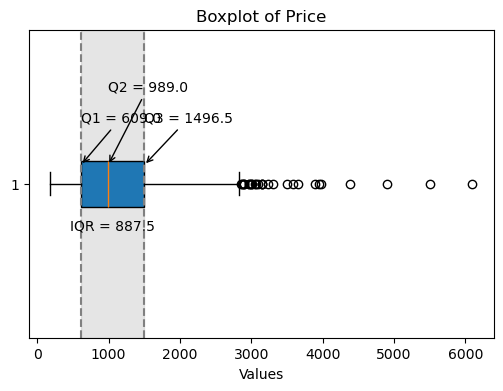

In [67]:
plt.figure(figsize=(6, 4))
plt.boxplot(data['Price'], vert=False, patch_artist=True)

plt.annotate(f'Q1 = {q1}', xy=(q1, 1.06), xytext=(q1, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q2 = {q2}', xy=(q2, 1.06), xytext=(q2, 1.3), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q3 = {q3}', xy=(q3, 1.06), xytext=(q3, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'IQR = {iqr}', xy=((q1+q3)/2, 0.85), ha='center')

plt.axvline(q1, linestyle='--', color='gray', label='Q1')
plt.axvline(q3, linestyle='--', color='gray', label='Q3')
plt.axvspan(q1, q3, alpha=0.2, color='gray', label='IQR')

plt.xlabel('Values')
plt.title('Boxplot of Price')

plt.show()

Based on the data above, insight can be drawn, assuming:
1. Low-Budget is a price with a value less than Q1 (609)
2. Mid-Budget is the price with a value between Q1 and Q3 (609 - 1496.5)
3. High-Budget is a price with a value greater than Q3 (1496.5)

    Case: How to determine the optimal laptop specifications within a certain budget range?

In [68]:
# menambahkan dataset baru dengan menambahkan kolom price_range dari 'data'
def budget_range(price):
    if price < q1:
        return "Low Budget"
    elif price <= q3:
        return "Mid Budget"
    else:
        return "High Budget"
    
data['Price_Range'] = data['Price'].apply(budget_range)

data.to_csv('laptop_price_range.csv', index=False)

In [69]:
# Descriptive statistics for numerical columns
descriptive_stats = data[['Price', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory_Type_Score', 'GPU_Type_Score']].describe()

# Mengelompokkan data berdasarkan Price_Range, dengan menentukan mean dari spesifikasi laptop ('CPU_Frequency (GHz)', 'RAM (GB)', 'Memory_Type_Score', 'GPU_Type_Score')
price_range_stats = data.groupby('Price_Range')[
    ['Price', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory_Type_Score', 'GPU_Type_Score']
].mean()

descriptive_stats, price_range_stats

(             Price  CPU_Frequency (GHz)     RAM (GB)  Memory_Type_Score  \
 count  1275.000000          1275.000000  1275.000000        1275.000000   
 mean   1134.848627             2.302980     8.440784           2.298824   
 std     700.762148             0.503846     5.097809           0.856753   
 min     174.000000             0.900000     2.000000           1.000000   
 25%     609.000000             2.000000     4.000000           1.000000   
 50%     989.000000             2.500000     8.000000           2.500000   
 75%    1496.500000             2.700000     8.000000           3.000000   
 max    6099.000000             3.600000    64.000000           3.000000   
 
        GPU_Type_Score  
 count     1275.000000  
 mean         1.009412  
 std          0.096595  
 min          1.000000  
 25%          1.000000  
 50%          1.000000  
 75%          1.000000  
 max          2.000000  ,
                    Price  CPU_Frequency (GHz)   RAM (GB)  Memory_Type_Score  \
 Price_R

Based on the data above, it can be concluded that:
General Statistics:
1. Prices have:
 - Average: 1134.85
 - Standard deviation: 700.76
 - Minimum: 174
 - Maximum: 6099 
2. Key specifications (based on the dataset):
    1. CPU_Frequency (GHz):
    - Average: 2.3GHz
    - Miminum: 0.9GHZ
    - Maximum: 3.6GHz
    2. RAM (GB):
    - Average: 8.4GB
    - Miminum: 2GB
    - Maximum: 64GB
    3. Memory_Type_Score:
    - Average: 2.3
    4. GPU_Type_Score:
    - Almost all laptops have a score of 1 (Integrated GPU), with a few reaching a score of 2 (Discrete GPU)

Statistics by Price Range:<br>
High Budget:
- Average price: 2103.65
- CPU_Frequency: 2.57 GHz
- RAM: 13.22 GB
- Memory_Type_Score: 2.78

Mid Budget:
- Average Price: 1002.40
- CPU_Frequency: 2.33 GHz
- RAM: 7.96 GB
- Memory_Type_Score: 2.37

Low Budget:
- Average Price: 428.72
- CPU_Frequency: 1.98 GHz
- RAM: 4.62 GB
- Memory_Type_Score: 1.67

### Analysis of Inferential Statistical Calculations

H0: There is no significant difference between prices by Company<br>
H1: There is a significant difference between prices based on Company

In [70]:
data['Company'].nunique()

19

In [71]:
#
res = stats.f_oneway(
    *[data[data['Company'] == company]['Price'] for company in data['Company'].unique()]
)
print('P-value:',res.pvalue)

P-value: 4.89304520189092e-38


Since the p-value is very small (smaller than 0.05), it can be concluded that there is a statistically significant difference in laptop prices by brand.

### Data Visualization

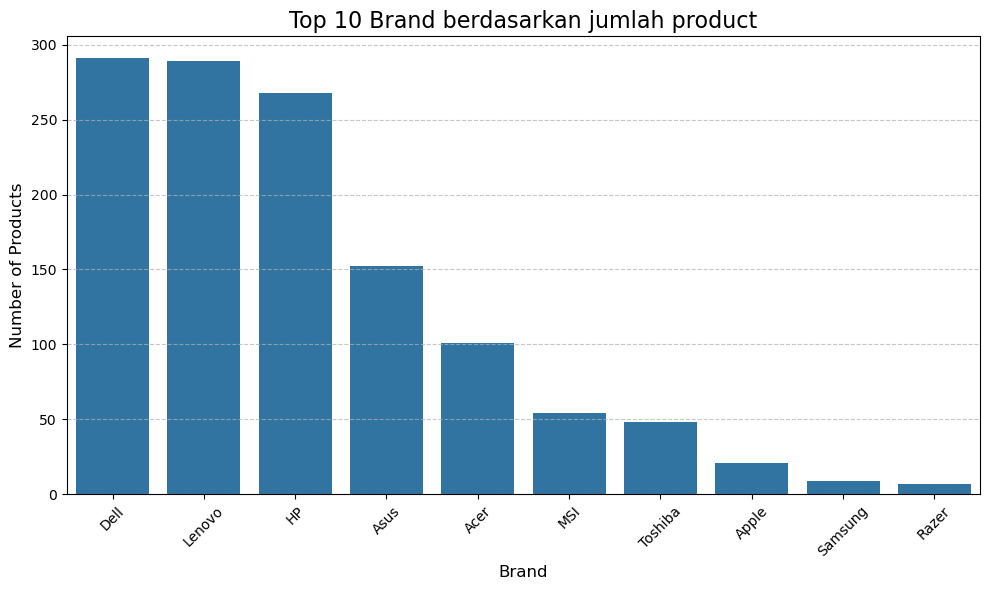

In [72]:
brand_counts = data['Company'].value_counts(ascending=False)


# # Menggambarkan top 10 brand
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_counts.head(10).index, y=brand_counts.head(10).values)
plt.title('Top 10 Brand berdasarkan jumlah product', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The graph above shows the 10 laptop brands with the highest number of products. Dell, Lenovo, and HP brands dominate the number of products in the dataset.

    Case: What type of laptop does the brand release the most?

In [73]:
# Hitung banyaknya laptop berdasarkan tipe untuk setiap brand
type_count_by_company = data.groupby("Company")["TypeName"].value_counts().unstack(fill_value=0)

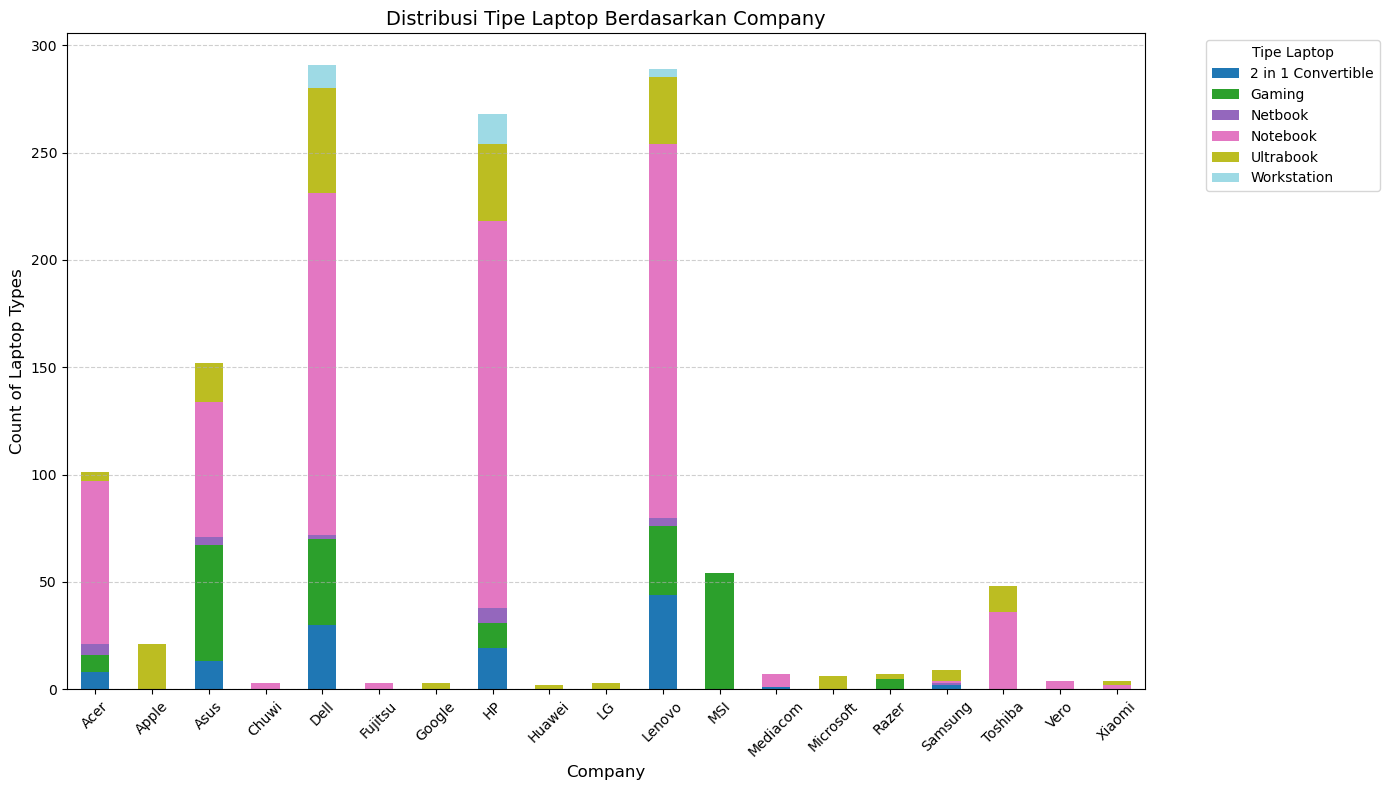

In [74]:
# gambarkan distribusi dari tipe laptop berdasarkan brand
type_count_by_company.plot(kind="bar", stacked=True, figsize=(14, 8), colormap="tab20")

plt.title("Distribusi Tipe Laptop Berdasarkan Company", fontsize=14)
plt.xlabel("Company", fontsize=12)
plt.ylabel("Count of Laptop Types", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Tipe Laptop", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

The graph above shows the distribution of laptop types by brand.<br>
Based on the data of the graph, we can conclude that:

1. Notebook is the most common type produced by many brands, mainly by Dell, HP, and Lenovo.
2. Ultrabooks are often found in brands such as Apple and Dell.
3. Gaming laptops dominate MSI's production.
4. Specific types such as 2 in 1 Convertibles are more often produced by Lenovo and Dell.

    Case: Bagaimana korelasi antara RAM dan Harga?

In [75]:
corr_ram = stats.pearsonr(data["RAM (GB)"], data["Price"])
print('Korelasi Antara RAM dan Harga:')
print('r:', corr_ram.statistic)
print('P-Value:', corr_ram.pvalue)

Korelasi Antara RAM dan Harga:
r: 0.740292375009767
P-Value: 9.022152168236277e-222


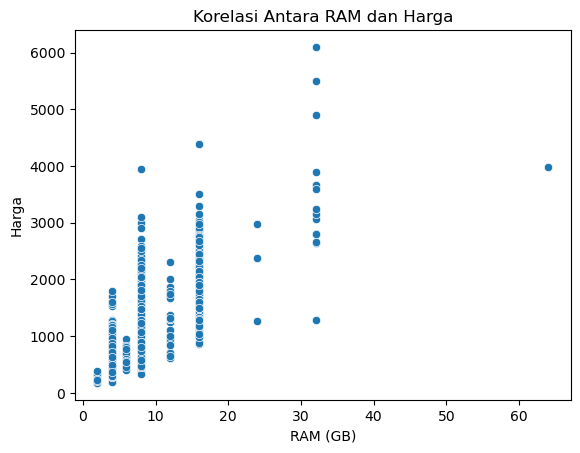

In [76]:
fig, ax = plt.subplots()

ax.set_title('Korelasi Antara RAM dan Harga')
ax.set_xlabel('RAM (GB)')
ax.set_ylabel('Harga')

sns.scatterplot(data=data ,x='RAM (GB)',y='Price',ax=ax)
plt.show()

Based on the data above, it can be concluded that:
- With a Correlation value (r): 0.74, RAM has a strong positive relationship with Price, so it can be interpreted that laptop price has a significant and strong relationship with RAM capacity. The larger the RAM, the higher the price of the laptop
- With p-value: 9.02 × 10-²²²

    Case: What is the correlation between CPU Frequency and Price?

In [77]:
corr_cpu = stats.pearsonr(data['CPU_Frequency (GHz)'], data["Price"])
print('Korelasi Antara Frekuensi CPU dan Harga:')
print('r:', corr_cpu.statistic)
print('P-Value:', corr_cpu.pvalue)

Korelasi Antara Frekuensi CPU dan Harga:
r: 0.4288479367415287
P-Value: 3.4413131705953736e-58


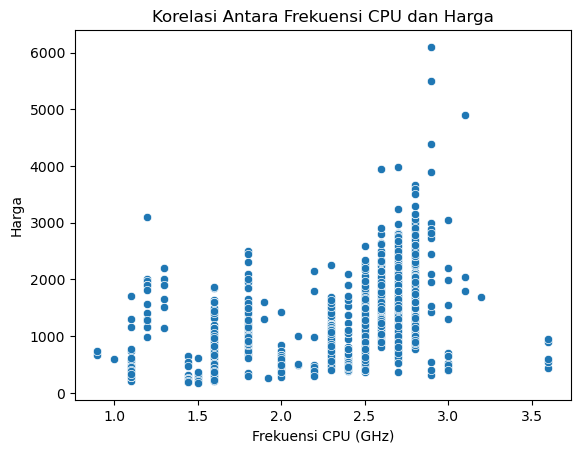

In [78]:
fig, ax = plt.subplots()

ax.set_title('Korelasi Antara Frekuensi CPU dan Harga')
ax.set_xlabel('Frekuensi CPU (GHz)')
ax.set_ylabel('Harga')

sns.scatterplot(data=data ,x='CPU_Frequency (GHz)',y='Price',ax=ax)
plt.show()

Based on the data above, it can be concluded that:
- With a Correlation value (r): 0.42, CPU Frequency has a moderate positive relationship with Price so it can be interpreted that CPU Frequency has a significant contribution to the price of laptops, although not as strong as RAM.
- With p-value: 3.44 × 10-⁵⁸

    Case: What is the correlation between memory type Score and Price?

In [79]:
corr_memory_score = stats.pearsonr(data['Memory_Type_Score'], data["Price"])
print('Korelasi Antara Skor Tipe Memori dan Harga:')
print('r', corr_memory_score.statistic)
print('P-Value', corr_memory_score.pvalue)

Korelasi Antara Skor Tipe Memori dan Harga:
r 0.4398185491248426
P-Value 1.9005662239140273e-61


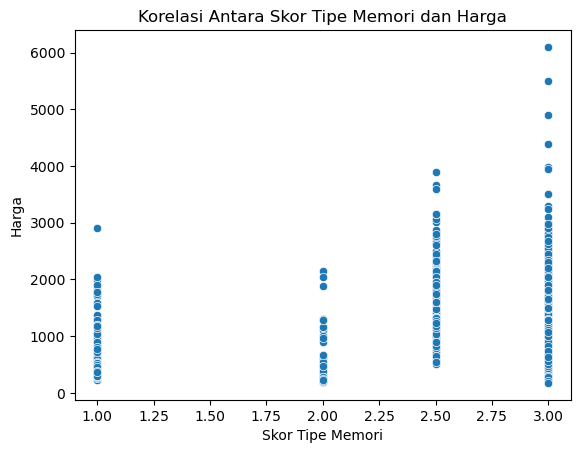

In [80]:
fig, ax = plt.subplots()

ax.set_title('Korelasi Antara Skor Tipe Memori dan Harga')
ax.set_xlabel('Skor Tipe Memori')
ax.set_ylabel('Harga')

sns.scatterplot(data=data ,x='Memory_Type_Score',y='Price',ax=ax)
plt.show()

Based on the data above, it can be concluded that:
- With a Correlation (r) value of: 0.42, the score of memory type has a moderate positive relationship with Price so it can be interpreted that memory type has a significant impact on laptop price, with higher memory type scores (possibly SSD) contributing to higher prices.
- With a p-value of: 3.44 × 10-⁵⁸

    Case: What is the correlation between GPU Type Score and Price?

In [81]:
corr_gpu_score = stats.pearsonr(data['GPU_Type_Score'], data["Price"])

print('Korelasi Antara Skor Tipe GPU dan Harga:')
print('r', corr_gpu_score.statistic)
print('P-Value', corr_gpu_score.pvalue)

Korelasi Antara Skor Tipe GPU dan Harga:
r 0.017554184993961778
P-Value 0.5311554137212773


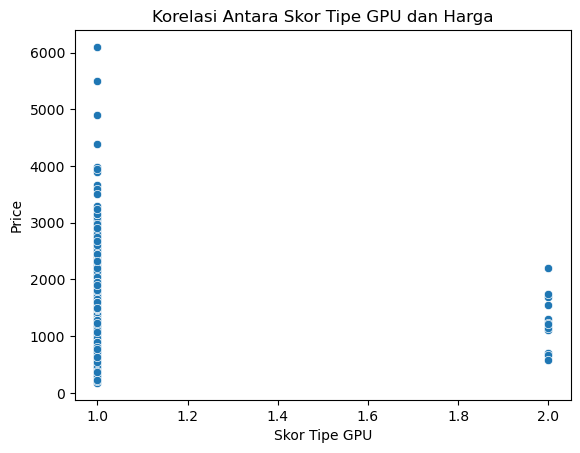

In [82]:
fig, ax = plt.subplots()

ax.set_title('Korelasi Antara Skor Tipe GPU dan Harga')
ax.set_xlabel('Skor Tipe GPU')
ax.set_ylabel('Price')

sns.scatterplot(data=data ,x='GPU_Type_Score',y='Price',ax=ax)
plt.show()

Based on the data above, it can be concluded that:
- With a Correlation (r) value: 0.017, CPU Frequency has a very weak and almost insignificant positive relationship with Price, so it can be interpreted that the GPU type score does not contribute significantly to the variation of laptop prices in this dataset.
- With a p-value of: 3.44 × 10-⁵⁸

Based on the four correlation data above, it can be concluded that:
- RAM is the most significant specification in determining the price of a laptop.
- CPU speed and storage memory type are also influential, although not as much as RAM.
- GPU type does not seem to be a major factor in determining price, probably because most laptops use integrated GPUs.

# Conclusion

 Based on the analysis that has been done, to make a laptop purchase:
 1. Determine the desired budget
 2. In the selection of specifications:
  - Focus on RAM for optimal working
  - Choose SSD over HDD for better speed
  - Choose a higher CPU Frequency.
 
Based on this analysis, we can conclude that buyers can choose the optimal laptop they want according to their budget, here are the details:
1. Low Budget (< 609 Euro):
 - Optimal laptop based on the analysis:
  - Lenovo IdeaPad 520S-14IKB: 8 GB RAM, 256 GB SSD, Intel i3 CPU, 599 Euro
2. Mid Budget (609 - 1,496 Euro):
 - Optimal laptop based on analysis:
  - Asus G701VO-IH74K: 32 GB RAM, 512 GB SSD, Intel i7 CPU, Nvidia GTX 980M, 1,279 Euro
3. High Budget (> 1,496 Euro):
 - Optimal laptop based on analysis:
  - Asus ROG G701VO: 64 GB RAM, 1 TB SSD, Intel i7 CPU, Nvidia GTX 980, 3,975 Euro